In [3]:
import imagej
import scyjava as sj

# initialize ImageJ
ij = imagej.init('sc.fiji:fiji', mode='interactive')
print(f"ImageJ version: {ij.getVersion()}")

ImageJ version: 2.15.0/1.54f


In [1]:
import matplotlib.pyplot as plt

<>:2: SyntaxWarning: invalid escape sequence '\A'
<>:2: SyntaxWarning: invalid escape sequence '\A'
C:\Users\akorada\AppData\Local\Temp\4\ipykernel_17376\505117456.py:2: SyntaxWarning: invalid escape sequence '\A'
  image_path = 'E:\AK\INSCOPIX_DATA\Chamber_20240920-164820\INSCOPIX\Pre_Processed_0180.tiff'


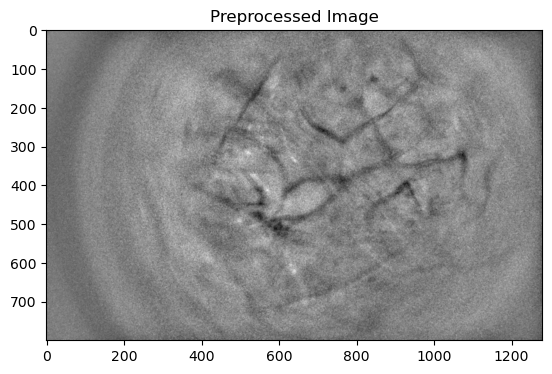

In [4]:
# Load the image (assuming it's a .tif or other format ImageJ can handle)
image_path = 'E:\AK\INSCOPIX_DATA\Chamber_20240920-164820\INSCOPIX\Pre_Processed_0180.tiff'
image = ij.io().open(image_path)

# Convert to ImageJ2 dataset for further processing
dataset = ij.py.from_java(image)

# Display the image using matplotlib
plt.imshow(dataset, cmap='gray')
plt.title("Preprocessed Image")
plt.show()


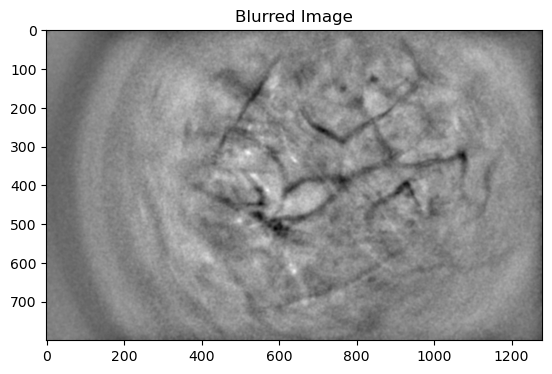

In [7]:
# Ensure the image is converted to a format that ImageJ understands
image_rai = ij.py.to_java(dataset)  # Converts the NumPy array to a RandomAccessibleInterval

# Apply the Gaussian blur using floating-point values for sigma
blurred_image = ij.op().filter().gauss(image_rai, [2.0, 2.0])  # Sigma values as floating-point numbers

# Convert the result back to a NumPy array for visualization or further processing in Python
blurred_image_np = ij.py.from_java(blurred_image)

# Display the blurred image
plt.imshow(blurred_image_np, cmap='gray')
plt.title("Blurred Image")
plt.show()


In [9]:
image_rai = ij.py.to_java(blurred_image_np) 

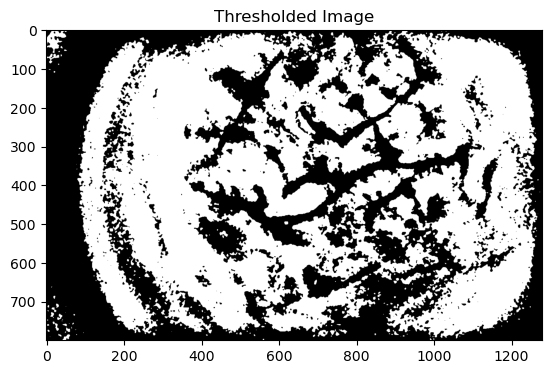

In [11]:
# Apply Otsu's thresholding (Automatically calculates the best threshold)
threshold = ij.op().threshold().otsu(blurred_image)

# Convert the thresholded image back to NumPy for further processing
threshold_np = ij.py.from_java(threshold)

# Display the thresholded image
plt.imshow(threshold_np, cmap='gray')
plt.title("Thresholded Image")
plt.show()


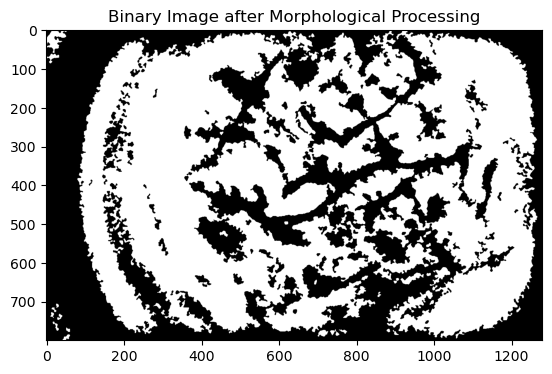

In [12]:
from skimage import morphology

# Perform binary closing to connect small gaps
binary_image = morphology.binary_closing(threshold_np)

# Remove small objects that are unlikely to be neurons
binary_image = morphology.remove_small_objects(binary_image, min_size=50)

# Fill small holes inside the neurons
binary_image = morphology.remove_small_holes(binary_image, area_threshold=50)

# Display the cleaned binary image
plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image after Morphological Processing")
plt.show()


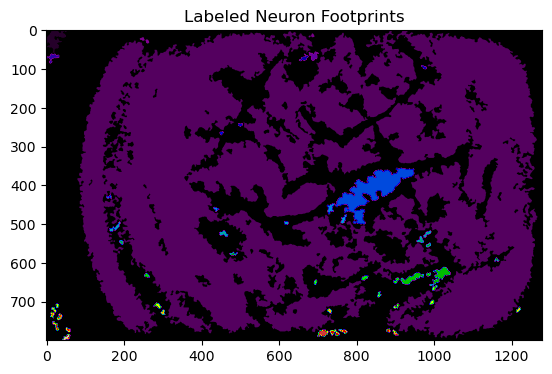

In [13]:
from skimage import measure

# Label connected components in the binary image
labeled_image = measure.label(binary_image, connectivity=2)

# Display the labeled image
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title("Labeled Neuron Footprints")
plt.show()


In [14]:
# Measure properties of labeled neurons
properties = measure.regionprops(labeled_image)

# Extract and display the centroid and area of each neuron
for prop in properties:
    print(f'Neuron {prop.label}: Centroid: {prop.centroid}, Area: {prop.area}')


Neuron 1: Centroid: (np.float64(23.092327698309493), np.float64(22.389466840052016)), Area: 1538.0
Neuron 2: Centroid: (np.float64(383.42605475743716), np.float64(672.6942179462263)), Area: 581437.0
Neuron 3: Centroid: (np.float64(14.3125), np.float64(685.825)), Area: 80.0
Neuron 4: Centroid: (np.float64(22.83076923076923), np.float64(248.4)), Area: 65.0
Neuron 5: Centroid: (np.float64(29.083333333333332), np.float64(261.1333333333333)), Area: 60.0
Neuron 6: Centroid: (np.float64(66.43630573248407), np.float64(690.391719745223)), Area: 314.0
Neuron 7: Centroid: (np.float64(70.03021148036254), np.float64(16.48036253776435)), Area: 331.0
Neuron 8: Centroid: (np.float64(72.23463687150839), np.float64(665.6368715083798)), Area: 179.0
Neuron 9: Centroid: (np.float64(95.70270270270271), np.float64(975.5)), Area: 74.0
Neuron 10: Centroid: (np.float64(244.15151515151516), np.float64(501.0151515151515)), Area: 66.0
Neuron 11: Centroid: (np.float64(265.56363636363636), np.float64(452.52727272727

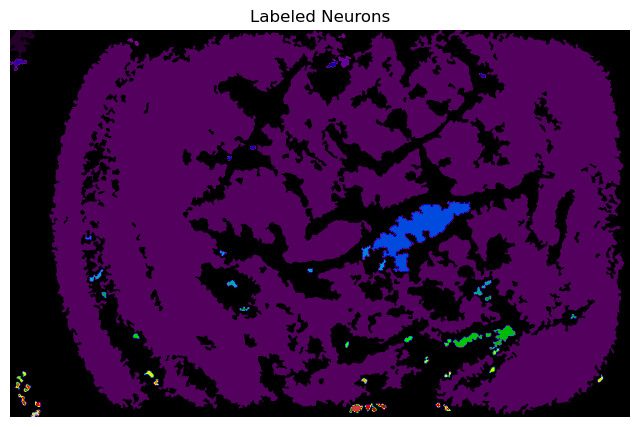

In [15]:
import matplotlib.pyplot as plt
from skimage import measure, morphology

# Step 1: Apply Otsu's thresholding (Separates neurons from background)
threshold = ij.op().threshold().otsu(blurred_image)
threshold_np = ij.py.from_java(threshold)

# Step 2: Perform binary closing to clean the image and fill small holes
binary_image = morphology.binary_closing(threshold_np)
binary_image = morphology.remove_small_objects(binary_image, min_size=50)
binary_image = morphology.remove_small_holes(binary_image, area_threshold=50)

# Step 3: Label the connected components (neurons)
labeled_image = measure.label(binary_image, connectivity=2)

# Step 4: Visualize the labeled neurons
# Display the labeled image using a color map
plt.figure(figsize=(8, 8))
plt.imshow(labeled_image, cmap='nipy_spectral')
plt.title("Labeled Neurons")
plt.axis('off')
plt.show()


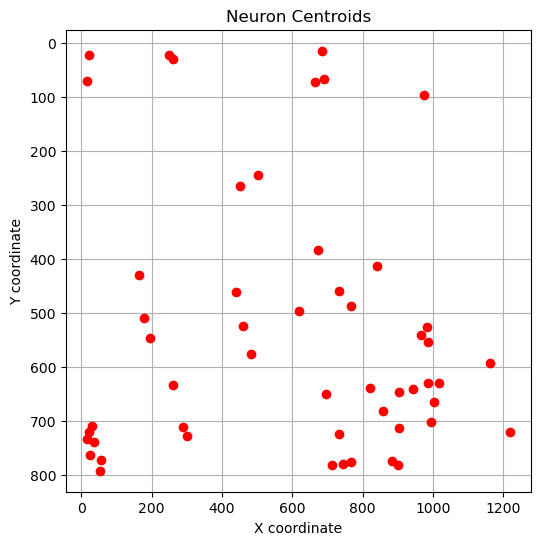

In [16]:
import matplotlib.pyplot as plt
from skimage import measure, morphology

# Step 1: Apply Otsu's thresholding to separate neurons from the background
threshold = ij.op().threshold().otsu(blurred_image)
threshold_np = ij.py.from_java(threshold)

# Step 2: Clean the binary image (optional but useful for noise removal)
binary_image = morphology.binary_closing(threshold_np)
binary_image = morphology.remove_small_objects(binary_image, min_size=50)
binary_image = morphology.remove_small_holes(binary_image, area_threshold=50)

# Step 3: Label the connected components (neurons)
labeled_image = measure.label(binary_image, connectivity=2)

# Step 4: Extract centroids of the labeled neurons
properties = measure.regionprops(labeled_image)

# Collect all centroids
centroids = [prop.centroid for prop in properties]

# Step 5: Plot the centroids on a blank canvas
plt.figure(figsize=(6, 6))
for centroid in centroids:
    plt.plot(centroid[1], centroid[0], 'ro')  # Plot centroids as red dots ('ro')
    
plt.gca().invert_yaxis()  # Invert the y-axis to match image coordinates
plt.title("Neuron Centroids")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.grid(True)
plt.show()


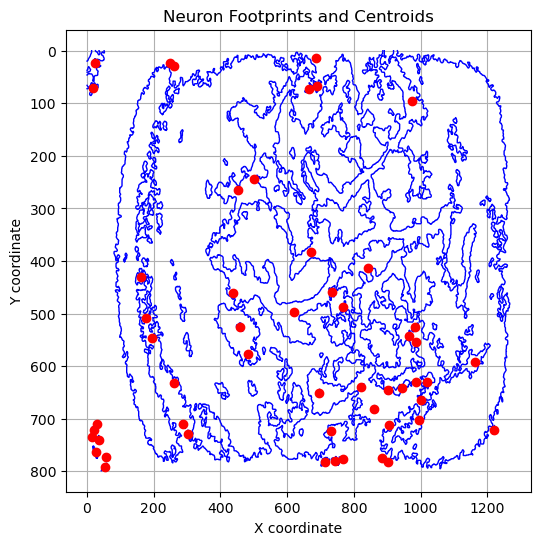

In [17]:
import matplotlib.pyplot as plt
from skimage import measure, morphology

# Step 1: Apply Otsu's thresholding to separate neurons from the background
threshold = ij.op().threshold().otsu(blurred_image)
threshold_np = ij.py.from_java(threshold)

# Step 2: Clean the binary image (optional but useful for noise removal)
binary_image = morphology.binary_closing(threshold_np)
binary_image = morphology.remove_small_objects(binary_image, min_size=50)
binary_image = morphology.remove_small_holes(binary_image, area_threshold=50)

# Step 3: Label the connected components (neurons)
labeled_image = measure.label(binary_image, connectivity=2)

# Step 4: Extract neuron footprints (contours) and centroids
properties = measure.regionprops(labeled_image)

# Collect all centroids and contours
centroids = [prop.centroid for prop in properties]
contours = measure.find_contours(binary_image, 0.8)  # 0.8 is the level at which to find contours

# Step 5: Plot neuron footprints and centroids on a blank canvas
plt.figure(figsize=(6, 6))

# Plot each neuron's contour (footprint)
for contour in contours:
    plt.plot(contour[:, 1], contour[:, 0], 'b-', linewidth=1)  # Plot contours as blue lines ('b-')

# Plot each neuron's centroid as a red dot
for centroid in centroids:
    plt.plot(centroid[1], centroid[0], 'ro')  # Plot centroids as red dots ('ro')

plt.gca().invert_yaxis()  # Invert the y-axis to match image coordinates
plt.title("Neuron Footprints and Centroids")
plt.xlabel("X coordinate")
plt.ylabel("Y coordinate")
plt.grid(True)
plt.show()
